In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("airline_2m.csv",encoding='Iso-8859-1', low_memory=False, nrows=1000000)
pd.set_option('display.max_columns', None)

In [3]:
df2 = data.loc[:, data.isnull().mean() < .9]

In [4]:
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
0,1998,1,1,2,5,1998-01-02,NW,19386,NW,N297US,675,13487,1348701,31650,MSP,"Minneapolis, MN",MN,27.0,Minnesota,63,14869,1486902,34614,SLC,"Salt Lake City, UT",UT,49.0,Utah,87,1640,1659.0,19.0,19.0,1.0,1.0,1600-1659,24.0,1723.0,1856.0,3.0,1836,1859.0,23.0,23.0,1.0,1.0,1800-1859,0.0,0.0,176.0,180.0,153.0,1.0,991.0,4,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,2,5,28,4,2009-05-28,FL,20437,FL,N946AT,671,13342,1334202,33342,MKE,"Milwaukee, WI",WI,55.0,Wisconsin,45,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,1204,1202.0,-2.0,0.0,0.0,-1.0,1200-1259,10.0,1212.0,1533.0,8.0,1541,1541.0,0.0,0.0,0.0,0.0,1500-1559,0.0,0.0,157.0,159.0,141.0,1.0,1066.0,5,NaN,NaN,NaN,NaN,NaN,0.0
2,2013,2,6,29,6,2013-06-29,MQ,20398,MQ,N665MQ,3297,11921,1192102,31921,GJT,"Grand Junction, CO",CO,8.0,Colorado,82,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,1630,1644.0,14.0,14.0,0.0,0.0,1600-1659,9.0,1653.0,1936.0,6.0,1945,1942.0,-3.0,0.0,0.0,-1.0,1900-1959,0.0,0.0,135.0,118.0,103.0,1.0,773.0,4,NaN,NaN,NaN,NaN,NaN,0.0
3,2010,3,8,31,2,2010-08-31,DL,19790,DL,N6705Y,1806,12892,1289201,32575,LAX,"Los Angeles, CA",CA,6.0,California,91,11433,1143301,31295,DTW,"Detroit, MI",MI,26.0,Michigan,43,1305,1305.0,0.0,0.0,0.0,0.0,1300-1359,23.0,1328.0,2008.0,7.0,2035,2015.0,-20.0,0.0,0.0,-2.0,2000-2059,0.0,0.0,270.0,250.0,220.0,1.0,1979.0,8,NaN,NaN,NaN,NaN,NaN,0.0
4,2006,1,1,15,7,2006-01-15,US,20355,US,N504AU,465,11618,1161801,31703,EWR,"Newark, NJ",NJ,34.0,New Jersey,21,11057,1105702,31057,CLT,"Charlotte, NC",NC,37.0,North Carolina,36,1820,1911.0,51.0,51.0,1.0,3.0,1800-1859,19.0,1930.0,2050.0,8.0,2026,2058.0,32.0,32.0,1.0,2.0,2000-2059,0.0,0.0,126.0,107.0,80.0,1.0,529.0,3,0.0,0.0,0.0,0.0,32.0,NaN


In [5]:
df2.isnull().sum(axis=0)

Year                       0
Quarter                    0
Month                      0
DayofMonth                 0
DayOfWeek                  0
                       ...  
WeatherDelay          889064
NASDelay              889064
SecurityDelay         889064
LateAircraftDelay     889064
DivAirportLandings    627234
Length: 61, dtype: int64

In [6]:
df2=df2.dropna()

In [7]:
df2.shape

(68951, 61)

In [8]:
df2.isnull().sum(axis=0)

Year                  0
Quarter               0
Month                 0
DayofMonth            0
DayOfWeek             0
                     ..
WeatherDelay          0
NASDelay              0
SecurityDelay         0
LateAircraftDelay     0
DivAirportLandings    0
Length: 61, dtype: int64

In [9]:
df2.head(2)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
7,2019,2,6,11,2,2019-06-11,9E,20363,9E,N927XJ,3459,10397,1039707,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,45.0,South Carolina,37,1950,2331.0,221.0,221.0,1.0,12.0,1900-1959,19.0,2350.0,25.0,6.0,2057,31.0,214.0,214.0,1.0,12.0,2000-2059,0.0,0.0,67.0,60.0,35.0,1.0,192.0,1,0.0,0.0,0.0,0.0,214.0,0.0
9,2018,1,2,8,4,2018-02-08,WN,19393,WN,N8688J,5932,13232,1323202,30977,MDW,"Chicago, IL",IL,17.0,Illinois,41,11259,1125903,30194,DAL,"Dallas, TX",TX,48.0,Texas,74,2030,2046.0,16.0,16.0,1.0,1.0,2000-2059,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,29.0,1.0,1.0,2200-2259,0.0,0.0,140.0,153.0,114.0,1.0,793.0,4,0.0,0.0,13.0,0.0,16.0,0.0


In [10]:
df2.tail()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings
999928,2011,1,1,17,1,2011-01-17,DL,19790,DL,N678DL,1469,10397,1039703,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,13204,1320401,31454,MCO,"Orlando, FL",FL,12.0,Florida,33,2030,2057.0,27.0,27.0,1.0,1.0,2000-2059,28.0,2125.0,2232.0,10.0,2156,2242.0,46.0,46.0,1.0,3.0,2100-2159,0.0,0.0,86.0,105.0,67.0,1.0,403.0,2,27.0,0.0,19.0,0.0,0.0,0.0
999944,2010,2,4,12,1,2010-04-12,OO,20304,OO,N701BR,6484,12280,1228001,32280,IDA,"Idaho Falls, ID",ID,16.0,Idaho,83,11292,1129202,30325,DEN,"Denver, CO",CO,8.0,Colorado,82,740,932.0,112.0,112.0,1.0,7.0,0700-0759,10.0,942.0,1050.0,8.0,912,1058.0,106.0,106.0,1.0,7.0,0900-0959,0.0,0.0,92.0,86.0,68.0,1.0,458.0,2,0.0,106.0,0.0,0.0,0.0,0.0
999955,2014,1,3,4,2,2014-03-04,EV,20366,EV,N717EV,4950,10693,1069302,30693,BNA,"Nashville, TN",TN,47.0,Tennessee,54,12953,1295302,31703,LGA,"New York, NY",NY,36.0,New York,22,955,1314.0,199.0,199.0,1.0,12.0,0900-0959,12.0,1326.0,1602.0,7.0,1307,1609.0,182.0,182.0,1.0,12.0,1300-1359,0.0,0.0,132.0,115.0,96.0,1.0,764.0,4,0.0,0.0,0.0,0.0,182.0,0.0
999967,2012,3,8,4,6,2012-08-04,EV,20366,EV,N878AS,5192,13367,1336703,33367,MLI,"Moline, IL",IL,17.0,Illinois,41,10397,1039705,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,1525,1532.0,7.0,7.0,0.0,0.0,1500-1559,9.0,1541.0,1837.0,4.0,1821,1841.0,20.0,20.0,1.0,1.0,1800-1859,0.0,0.0,116.0,129.0,116.0,1.0,633.0,3,2.0,5.0,13.0,0.0,0.0,0.0
999986,2015,3,7,14,2,2015-07-14,EV,20366,EV,N906EV,2632,11298,1129804,30194,DFW,"Dallas/Fort Worth, TX",TX,48.0,Texas,74,14674,1467402,34674,SAF,"Santa Fe, NM",NM,35.0,New Mexico,86,850,1025.0,95.0,95.0,1.0,6.0,0800-0859,22.0,1047.0,1105.0,4.0,937,1109.0,92.0,92.0,1.0,6.0,0900-0959,0.0,0.0,107.0,104.0,78.0,1.0,551.0,3,92.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df2=df2.drop(['FlightDate'], axis=1)

In [12]:
df2=df2.drop(['ArrDelay'], axis=1)

In [13]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df2["Reporting_Airline_code"] = lb_make.fit_transform(df2["Reporting_Airline"])
df2[["Reporting_Airline", "Reporting_Airline_code"]].head(11)

,Reporting_Airline,Reporting_Airline_code
7,9E,0
9,WN,19
23,YV,21
24,OO,15
44,US,17
45,WN,19
50,WN,19
82,EV,6
114,MQ,11
128,AA,1


In [14]:
df2=df2.drop(['Reporting_Airline'], axis=1)

In [15]:
df2=df2.drop(['IATA_CODE_Reporting_Airline'], axis=1)

In [16]:
df2.head(2)

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,Reporting_Airline_code
7,2019,2,6,11,2,20363,N927XJ,3459,10397,1039707,30397,ATL,"Atlanta, GA",GA,13.0,Georgia,34,10868,1086803,30868,CAE,"Columbia, SC",SC,45.0,South Carolina,37,1950,2331.0,221.0,221.0,1.0,12.0,1900-1959,19.0,2350.0,25.0,6.0,2057,31.0,214.0,1.0,12.0,2000-2059,0.0,0.0,67.0,60.0,35.0,1.0,192.0,1,0.0,0.0,0.0,0.0,214.0,0.0,0
9,2018,1,2,8,4,19393,N8688J,5932,13232,1323202,30977,MDW,"Chicago, IL",IL,17.0,Illinois,41,11259,1125903,30194,DAL,"Dallas, TX",TX,48.0,Texas,74,2030,2046.0,16.0,16.0,1.0,1.0,2000-2059,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,1.0,1.0,2200-2259,0.0,0.0,140.0,153.0,114.0,1.0,793.0,4,0.0,0.0,13.0,0.0,16.0,0.0,19


In [17]:
df2.loc[:, df2.dtypes == 'object'].head(1)

,Tail_Number,Origin,OriginCityName,OriginState,OriginStateName,Dest,DestCityName,DestState,DestStateName,DepTimeBlk,ArrTimeBlk
7,N927XJ,ATL,"Atlanta, GA",GA,Georgia,CAE,"Columbia, SC",SC,South Carolina,1900-1959,2000-2059


In [18]:
df2=df2.drop(['OriginCityName'], axis=1)
df2=df2.drop(['OriginStateName'], axis=1)
df2=df2.drop(['DestCityName'], axis=1)
df2=df2.drop(['DestStateName'], axis=1)
df2=df2.drop(['DepTimeBlk'], axis=1)
df2=df2.drop(['ArrTimeBlk'], axis=1)

In [19]:
lb_make = LabelEncoder()
df2["Origin"] = lb_make.fit_transform(df2["Origin"])
df2["OriginState"] = lb_make.fit_transform(df2["OriginState"])
df2["Dest"] = lb_make.fit_transform(df2["Dest"])
df2["DestState"] = lb_make.fit_transform(df2["DestState"])

In [20]:
df2.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginState,OriginStateFips,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestState,DestStateFips,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivAirportLandings,Reporting_Airline_code
7,2019,2,6,11,2,20363,N927XJ,3459,10397,1039707,30397,20,8,13.0,34,10868,1086803,30868,58,40,45.0,37,1950,2331.0,221.0,221.0,1.0,12.0,19.0,2350.0,25.0,6.0,2057,31.0,214.0,1.0,12.0,0.0,0.0,67.0,60.0,35.0,1.0,192.0,1,0.0,0.0,0.0,0.0,214.0,0.0,0
9,2018,1,2,8,4,19393,N8688J,5932,13232,1323202,30977,209,12,17.0,41,11259,1125903,30194,88,44,48.0,74,2030,2046.0,16.0,16.0,1.0,1.0,34.0,2120.0,2314.0,5.0,2250,2319.0,29.0,1.0,1.0,0.0,0.0,140.0,153.0,114.0,1.0,793.0,4,0.0,0.0,13.0,0.0,16.0,0.0,19
23,2020,1,3,24,2,20378,N933LR,5825,14107,1410702,30466,259,3,4.0,81,12954,1295407,32575,197,4,6.0,91,1858,1950.0,52.0,52.0,1.0,3.0,9.0,1959.0,2101.0,4.0,2021,2105.0,44.0,1.0,2.0,0.0,0.0,83.0,75.0,62.0,1.0,355.0,2,44.0,0.0,0.0,0.0,0.0,0.0,21
24,2010,3,8,20,5,20304,N976SW,6582,10800,1080002,32575,55,4,6.0,91,14771,1477101,32457,307,4,6.0,91,1342,1352.0,10.0,10.0,0.0,0.0,20.0,1412.0,1505.0,5.0,1453,1510.0,17.0,1.0,1.0,0.0,0.0,71.0,78.0,53.0,1.0,326.0,2,9.0,0.0,7.0,0.0,1.0,0.0,15
44,2012,3,7,25,3,20355,N631AW,261,13487,1348702,31650,231,21,27.0,63,14107,1410702,30466,262,3,4.0,81,1755,1833.0,38.0,38.0,1.0,2.0,13.0,1846.0,1931.0,5.0,1914,1936.0,22.0,1.0,1.0,0.0,0.0,199.0,183.0,165.0,1.0,1276.0,6,1.0,0.0,0.0,0.0,21.0,0.0,17


In [21]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df2["Tail_Number"] = lb_make.fit_transform(df2["Tail_Number"])
df2[["Tail_Number"]].head(11)

,Tail_Number
7,7483
9,6780
23,7568
24,8064
44,4511
45,7736
50,3245
82,834
114,3432
128,6033


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68951 entries, 7 to 999986
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             68951 non-null  int64  
 1   Quarter                          68951 non-null  int64  
 2   Month                            68951 non-null  int64  
 3   DayofMonth                       68951 non-null  int64  
 4   DayOfWeek                        68951 non-null  int64  
 5   DOT_ID_Reporting_Airline         68951 non-null  int64  
 6   Tail_Number                      68951 non-null  int64  
 7   Flight_Number_Reporting_Airline  68951 non-null  int64  
 8   OriginAirportID                  68951 non-null  int64  
 9   OriginAirportSeqID               68951 non-null  int64  
 10  OriginCityMarketID               68951 non-null  int64  
 11  Origin                           68951 non-null  int64  
 12  OriginState      

In [23]:
df2.shape

(68951, 52)

In [24]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df2.select_dtypes(include=numerics).columns)
df3 = df2[numerical_vars]


In [25]:
df3.shape

(68951, 52)

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression

# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop(labels=['ArrDelayMinutes'], axis=1),
    df3['ArrDelayMinutes'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((48265, 51), (20686, 51))

/home/abak/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/abak/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/abak/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/home/abak/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/abak/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/abak/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWa

<AxesSubplot:>

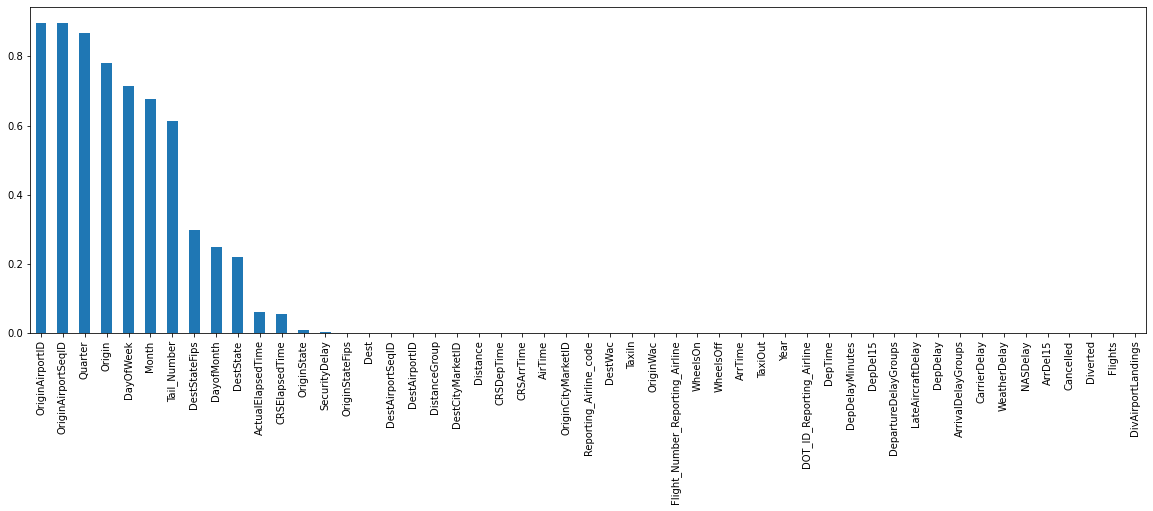

In [28]:
# univariate anova
univariate = f_regression(X_train.fillna(0), y_train)

# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

In [29]:

# select features in top 10th percentile
sel_ = SelectPercentile(f_regression,
                        percentile=10).fit(X_train.fillna(0), y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

/home/abak/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/home/abak/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/abak/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:307: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/home/abak/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/abak/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/abak/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWa

Index(['DepDelay', 'DepDelayMinutes', 'DepartureDelayGroups',
       'ArrivalDelayGroups', 'CarrierDelay'],
      dtype='object')

In [30]:
X = df3[['DepDelayMinutes','DepartureDelayGroups', 'ArrivalDelayGroups', 'CarrierDelay','DepDelay' ]]
y = df3['ArrDelayMinutes']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

X_train.shape, X_test.shape

((48265, 5), (20686, 5))

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train= scaler.fit_transform(X_train)

In [35]:
X_test = scaler.transform(X_test)

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [37]:
model = Sequential()

model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(5,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [38]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
378/378 [==============================] - 1s 2ms/step - loss: 7349.1772 - val_loss: 3329.5388
Epoch 2/400
378/378 [==============================] - 1s 2ms/step - loss: 1919.6256 - val_loss: 1374.0969
Epoch 3/400
378/378 [==============================] - 1s 2ms/step - loss: 1078.7803 - val_loss: 1112.8842
Epoch 4/400
378/378 [==============================] - 1s 2ms/step - loss: 935.0675 - val_loss: 974.8453
Epoch 5/400
378/378 [==============================] - 1s 2ms/step - loss: 800.7472 - val_loss: 808.3307
Epoch 6/400
378/378 [==============================] - 1s 2ms/step - loss: 638.1833 - val_loss: 618.6895
Epoch 7/400
378/378 [==============================] - 1s 2ms/step - loss: 459.7458 - val_loss: 424.1064
Epoch 8/400
378/378 [==============================] - 1s 2ms/step - loss: 303.7253 - val_loss: 278.0531
Epoch 9/400
378/378 [==============================] - 1s 1ms/step - loss: 203.2280 - val_loss: 192.2708
Epoch 10/400
378/378 [===========================

In [39]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

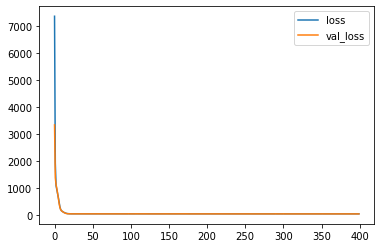

In [40]:
losses.plot()

In [41]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [42]:
predictions = model.predict(X_test)

In [43]:
mean_absolute_error(y_test,predictions)

4.040153206149672

In [44]:
np.sqrt(mean_squared_error(y_test,predictions))


5.925582690424064

In [48]:
df3['ArrDelayMinutes'].describe()

count    68951.000000
mean        59.773622
std         69.772521
min         15.000000
25%         23.000000
50%         37.000000
75%         71.000000
max       1898.000000
Name: ArrDelayMinutes, dtype: float64

In [45]:
explained_variance_score(y_test,predictions)

0.9930530761937375

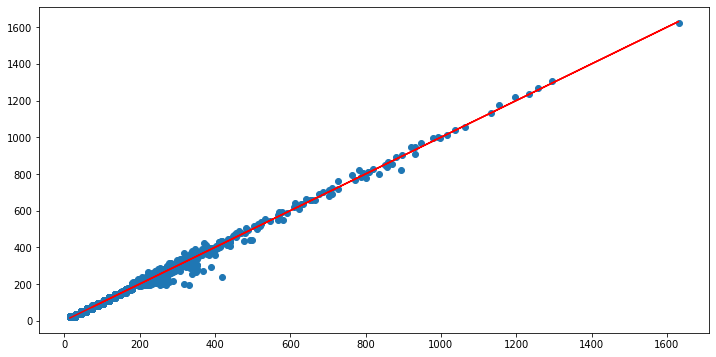

In [49]:
# Our predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

ValueError: cannot reshape array of size 20686 into shape (6480,1)